### Background and Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

Objective

To predict whether a liability customer will buy a personal loan or not.
Which variables are most significant.
Which segment of customers should be targeted more.
Project Dataset: Loan_Modelling.csv

Data Dictionary:
* ID: Customer ID
* Age: Customer’s age in completed years
* Experience: #years of professional experience
* Income: Annual income of the customer (in thousand dollars)
* ZIP Code: Home Address ZIP code.
* Family: the Family size of the customer
* CCAvg: Average spending on credit cards per month (in thousand dollars)
* Education: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* Mortgage: Value of house mortgage if any. (in thousand dollars)
* Personal_Loan: Did this customer accept the personal loan offered in the last campaign?
* Securities_Account: Does the customer have securities account with the bank?
* CD_Account: Does the customer have a certificate of deposit (CD) account with the bank?
* Online: Do customers use internet banking facilities?
* CreditCard: Does the customer use a credit card issued by any other Bank (excluding All life Bank)?

### Import the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import scipy.stats as stats
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Loan_Modelling.csv")

data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


- Observation: Label encoding has been done on the target variable (Personal_Loan), which simply means 0 represents "No/Reject" while 1 represents "Yes/Accept"

In [3]:
# check the firt few rows

data.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2081,2082,52,27,45,95006,1,1.3,2,0,0,0,0,0,0
139,140,59,35,18,93305,1,1.2,3,0,0,0,0,1,0
596,597,48,22,152,94022,1,3.5,3,0,1,0,0,1,0
2092,2093,53,23,19,92673,4,0.4,3,84,0,0,0,1,0
4858,4859,50,24,62,94550,2,0.8,3,0,0,0,0,1,0


- Some features may be dropped before modelling because they will not conttibute to our results. For instance; ID and ZIPCode.

In [4]:
# check the dimension
data.shape

(5000, 14)

- there are 5000 records in the dataset with 14 features

In [5]:
# check the data types

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


- there are no missing values in the dataset. 13 variables are of integer datatype while one variable (CCAvg) is of the float datatype.

In [6]:
# check for duplicate

data.duplicated().sum()

0

In [7]:
# Check for missing values

data.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

- there are no missing values in the dataset, which does not mean the dataset is clean.

In [8]:
# display the summary statistics (numerical columns by default)

data.describe()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93169.257000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,1759.455086,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,90005.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [9]:
# transpose the statistical summary table

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- #### Age of Customers:
    - The average age of customers in the dataset is 45 years and few months.
    - minumum age is 23 years and few months.
    - 25% of the customers are less than and equal to 35 years.
    - The median age (50%) of the customers is 45 years.
    - 75% (higher quartile) of the customers in the dataset are less than or equal to 55 years.
    - maximum age of customers is 67.

- #### Experience:
    - Average years of professional experience of customers is 20 years and few months.
    - minumum years of experience is -3 ( which is impossible).
    - 25% of the customers have less than or equal to 10 years experience.
    - 50% (median) years of experience is 20
    - 75% of the customers have 30 years of professional experience.

In [10]:
# check for the unique values in the experience column
data["Experience"].unique()

array([ 1, 19, 15,  9,  8, 13, 27, 24, 10, 39,  5, 23, 32, 41, 30, 14, 18,
       21, 28, 31, 11, 16, 20, 35,  6, 25,  7, 12, 26, 37, 17,  2, 36, 29,
        3, 22, -1, 34,  0, 38, 40, 33,  4, -2, 42, -3, 43], dtype=int64)

In [11]:
# check for the nuumber of occurence for each unique value
data["Experience"].value_counts()

 32    154
 20    148
 9     147
 5     146
 23    144
 35    143
 25    142
 28    138
 18    137
 19    135
 26    134
 24    131
 3     129
 16    127
 14    127
 30    126
 17    125
 34    125
 27    125
 22    124
 29    124
 7     121
 6     119
 15    119
 8     119
 10    118
 13    117
 33    117
 11    116
 37    116
 36    114
 21    113
 4     113
 31    104
 12    102
 38     88
 2      85
 39     85
 1      74
 0      66
 40     57
 41     43
-1      33
-2      15
 42      8
-3       4
 43      3
Name: Experience, dtype: int64

In [12]:
data["Experience"].describe()

count    5000.000000
mean       20.104600
std        11.467954
min        -3.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

In [13]:
data[data["Experience"] == -1]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
89,90,25,-1,113,94303,4,2.30,3,0,0,0,0,0,1
226,227,24,-1,39,94085,2,1.70,2,0,0,0,0,0,0
524,525,24,-1,75,93014,4,0.20,1,0,0,0,0,1,0
536,537,25,-1,43,92173,3,2.40,2,176,0,0,0,1,0
540,541,25,-1,109,94010,4,2.30,3,314,0,0,0,1,0
576,577,25,-1,48,92870,3,0.30,3,0,0,0,0,0,1
583,584,24,-1,38,95045,2,1.70,2,0,0,0,0,1,0
649,650,25,-1,82,92677,4,2.10,3,0,0,0,0,1,0
670,671,23,-1,61,92374,4,2.60,1,239,0,0,0,1,0
686,687,24,-1,38,92612,4,0.60,2,0,0,0,0,1,0


In [14]:
data[data["Experience"] == -2]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
315,316,24,-2,51,90630,3,0.30,3,0,0,0,0,1,0
451,452,28,-2,48,94132,2,1.75,3,89,0,0,0,1,0
597,598,24,-2,125,92835,2,7.20,1,0,0,1,0,0,1
793,794,24,-2,150,94720,2,2.00,1,0,0,0,0,1,0
889,890,24,-2,82,91103,2,1.60,3,0,0,0,0,1,1
2466,2467,24,-2,80,94105,2,1.60,3,0,0,0,0,1,0
2717,2718,23,-2,45,95422,4,0.60,2,0,0,0,0,1,1
2876,2877,24,-2,80,91107,2,1.60,3,238,0,0,0,0,0
2962,2963,23,-2,81,91711,2,1.80,2,0,0,0,0,0,0
3130,3131,23,-2,82,92152,2,1.80,2,0,0,1,0,0,1


In [15]:
data[data["Experience"] == -3]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0


In [16]:
data["Experience"].mean()

20.1046

In [17]:
data["Experience"].median()

20.0

In [18]:
data["Experience"].mode()

0    32
Name: Experience, dtype: int64

In [19]:
data[data["Experience"] == 32]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
13,14,59,32,40,94920,4,2.50,2,0,0,0,0,1,0
40,41,57,32,84,92672,3,1.60,3,0,0,1,0,0,0
76,77,58,32,12,91320,3,0.30,3,0,0,0,0,0,0
104,105,56,32,38,93311,4,1.30,1,166,0,0,0,1,1
122,123,58,32,73,94523,2,0.70,2,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4855,4856,58,32,130,94720,2,2.70,1,0,0,0,0,1,0
4880,4881,56,32,79,92037,3,2.67,1,0,0,0,0,1,0
4881,4882,57,32,24,92346,2,0.20,3,140,0,0,0,1,0
4968,4969,58,32,41,93022,4,2.50,1,0,0,0,0,1,1


In [20]:
data[data["Experience"] == -3]

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
3626,3627,24,-3,28,90089,4,1.0,3,0,0,0,0,0,0
4285,4286,23,-3,149,93555,2,7.2,1,0,0,0,0,1,0
4514,4515,24,-3,41,91768,4,1.0,3,0,0,0,0,1,0


- we could assume that the 3 negative numbers were wrongly typed and since their frequencies is approximately 1% of the total records, therefore, the negative sign could be removed and we will maintain the numbers.

In [21]:
# replace the negative values with their positive values assuming the negative sign was placed by mistake.

data["Experience"].replace([-1, -2, -3], [1, 2, 3], inplace = True)

In [22]:
data

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [23]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [24]:
# saving the cleaned dataset

data.to_csv("Loan_Modelling_cleaned.csv", index=False)

In [25]:
# read the cleaned dataset

data =pd.read_csv("Loan_Modelling_cleaned.csv")

In [26]:
# check for the first five rows

data.sample(5)

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
1171,1172,64,40,43,95014,1,1.90,2,0,0,0,0,1,0
1825,1826,56,32,161,94720,1,5.80,3,0,1,1,0,0,0
541,542,30,6,141,95014,2,4.33,1,0,0,0,0,0,0
2798,2799,58,33,28,94720,1,0.30,3,0,0,0,0,1,0
2357,2358,44,19,34,95005,4,0.00,2,0,0,0,0,0,0


In [27]:
# transpose the statistical summary table

data.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.134600,11.415189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


- #### Age of Customers:
    - The average age of customers in the dataset is 45 years and few months.
    - minumum age is 23 years and few months.
    - 25% of the customers are less than and equal to 35 years.
    - The median age (50%) of the customers is 45 years.
    - 75% (higher quartile) of the customers in the dataset are less than or equal to 55 years.
    - maximum age of customers is 67.

- #### Experience:
    - Average years of professional experience of customers is 20 years and few months.
    - minumum years of experience is now 0 (which is possible).
    - 25% of the customers have less than or equal to 10 years experience.
    - 50% (median) years of experience is 20
    - 75% of the customers have 30 years of professional experience.

### Visualize the data

In [28]:
# function to create labeled barplots

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

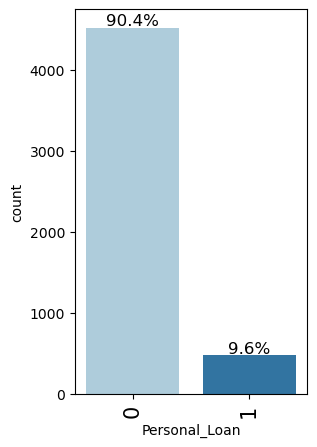

In [29]:
# comparing the two categories

labeled_barplot(data = data, feature = "Personal_Loan", perc = True)

- observations: the data is an imbalanced data because there are more zero category (90.4%) than 1 category (9.6%). There are more customers that will not collect personal loan.

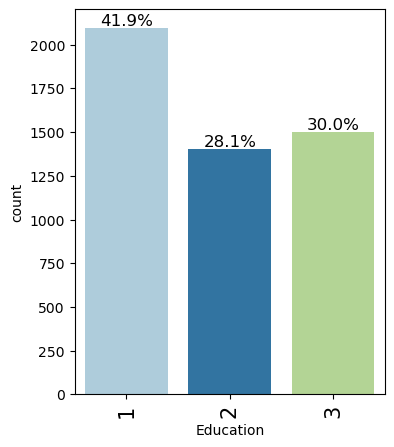

In [30]:
labeled_barplot(data = data, feature = "Education", perc = True)

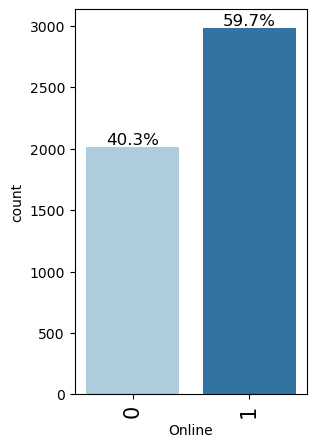

In [31]:
labeled_barplot(data = data, feature = "Online", perc = True)

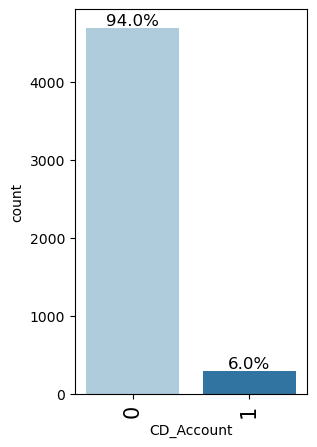

In [32]:
labeled_barplot(data = data, feature = "CD_Account", perc = True)

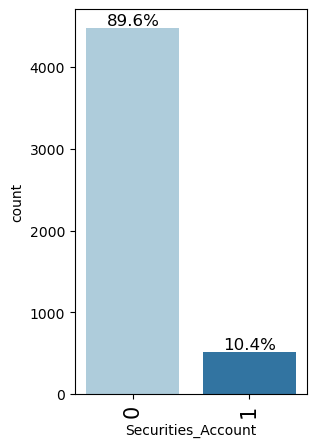

In [33]:
labeled_barplot(data = data, feature = "Securities_Account", perc = True)

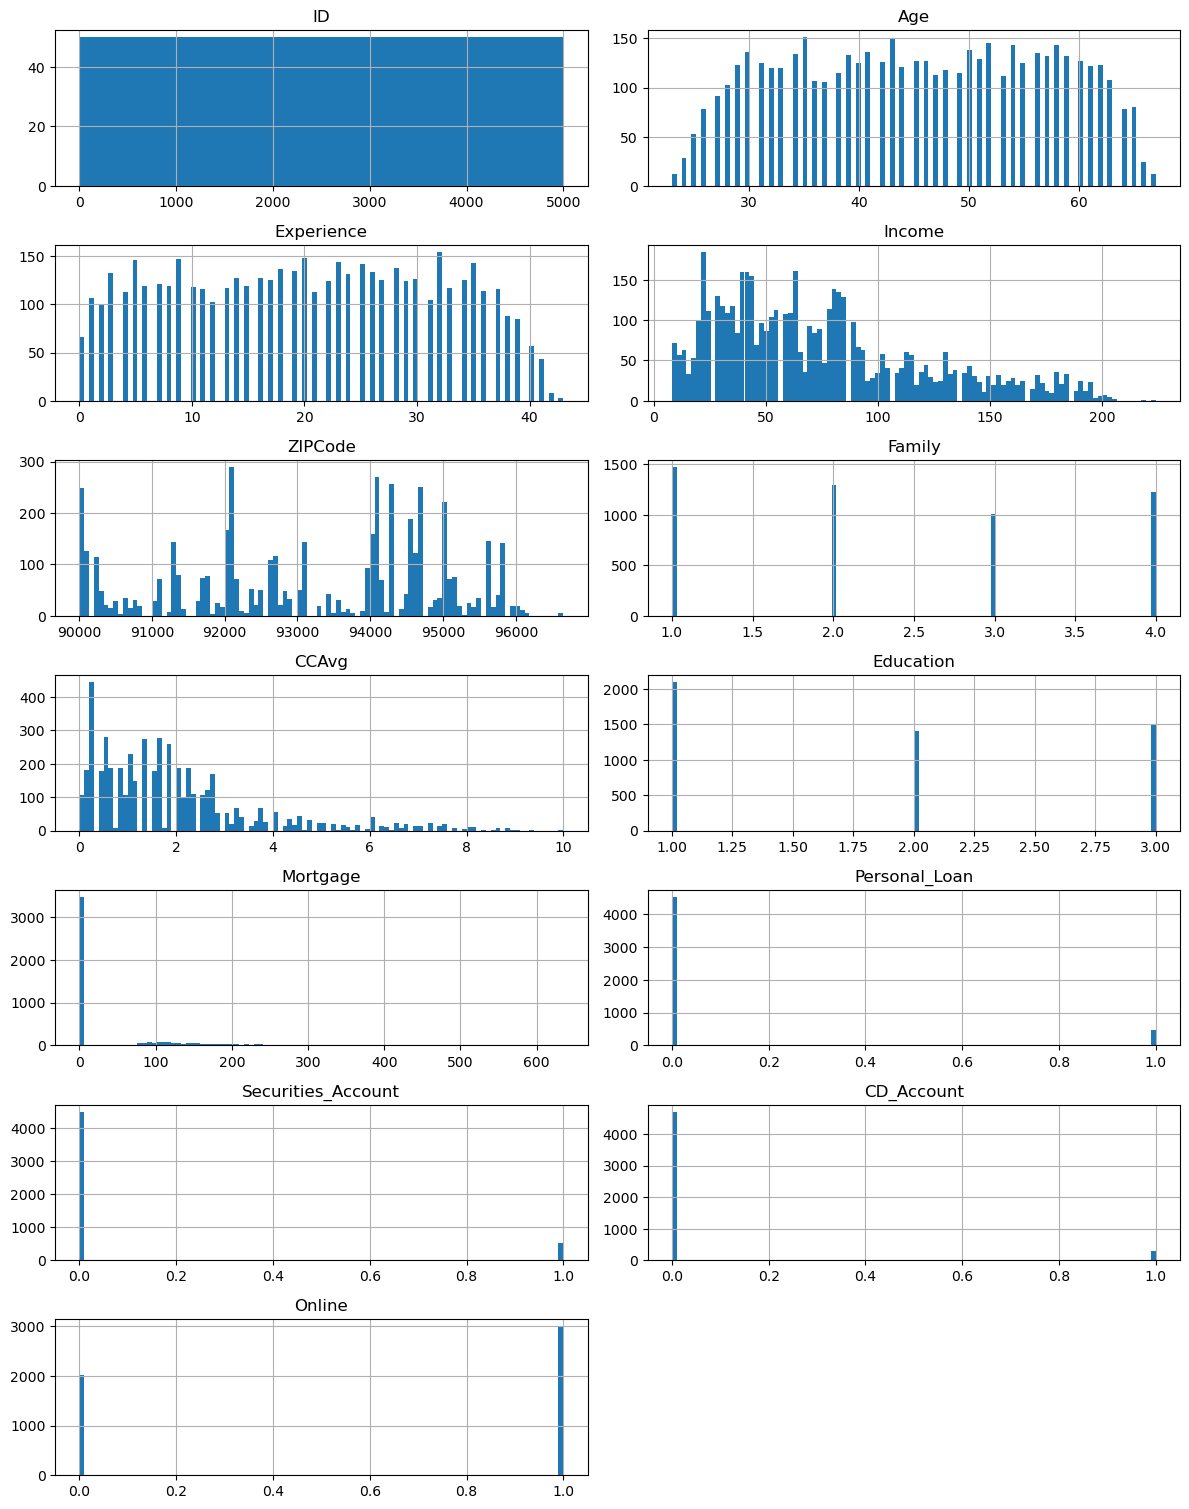

In [34]:
# visualizing each column

cols = list(data)[:-1] # saving the column names

data[cols].hist(stacked = False, bins = 100, figsize = (12, 30), layout = (14, 2)) # checking for the distribution
plt.tight_layout();

#### Age
    - The age column is uniformly distributed
    - The age between 35 and 43 has the highest occurrence

#### Experience
    - This is slightly uniformly distributed
    - The highest occurence is between 30 and 35 years

#### Income
    - The income column is rightly skewed.
    - Those receiving between 15 and 20 (thousand dollars) are more.
    
#### Family
    - family of one occurs more than other categories of family in the data.
    
#### Education
    - Undergraduates are more in the dataset.

### Identify correlation in the data

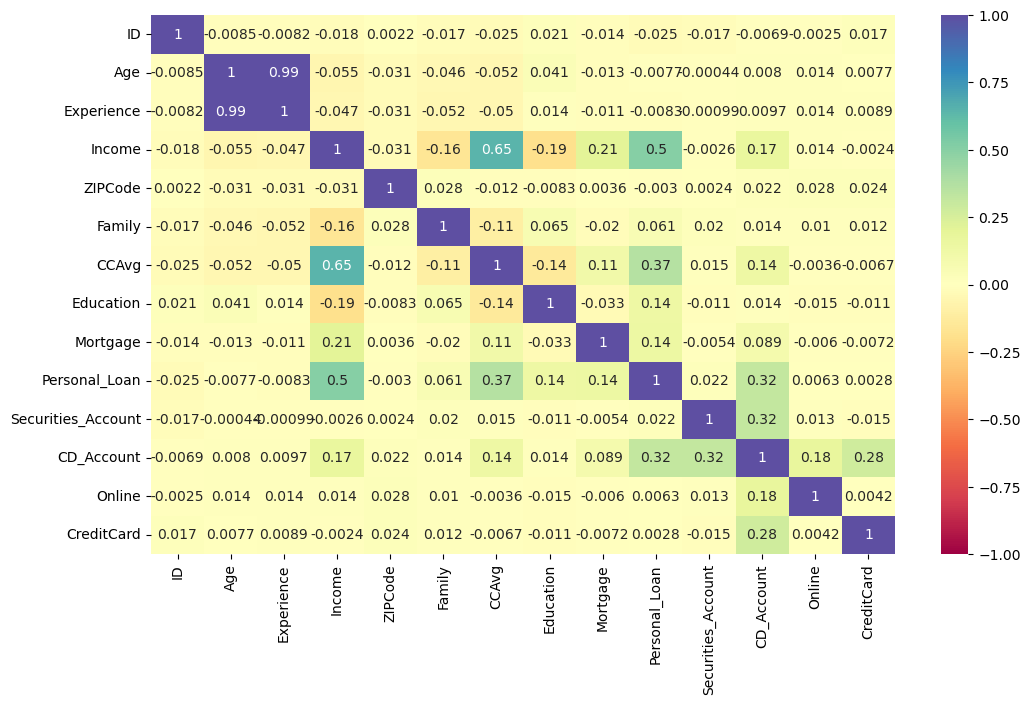

In [35]:
corr_mat = data.corr()

plt.figure(figsize = (12, 7))
sns.heatmap(corr_mat, annot = True, vmin = -1, vmax = 1, cmap = "Spectral");

- Most of the features in the dataset are not correlated.
- Income, CCAvg and CD_Account are positively correlated with personal loan (target) with 0.5, 0.37 and 0.32 respectively while Age and Experience are highly correlated.

### Calculate personal Loan ratio of Accept/Reject from Target variable

In [36]:
# check for the ratio of reject with accept

data["Personal_Loan"].value_counts(normalize = True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

So, we have 90.40% people in current data set who have not collected personal loan and rest of 9.60% have collected.

Its a good distribution Accept/Reject cases of personal loan in the data.

### Spliting the data 
We will use 80% of data for training and 20% for testing.

In [37]:
from sklearn.model_selection import train_test_split # to split
from sklearn.preprocessing import MinMaxScaler # to scale
from sklearn.impute import SimpleImputer # to prepare the data to fill the missing values

In [38]:
# Let check split of data

X = data.drop(["ID", "ZIPCode", "Personal_Loan"], axis = 1)
y = data["Personal_Loan"]

In [39]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)
# stratify = y is to maintain the proportion of the existing or original ratio of o and 1 in the dataset 
# (similar or close to this 0.651042:0.348958) in training data and testing data.

In [40]:
y_train

3509    0
1128    1
1636    0
3164    0
3562    1
       ..
3597    0
4670    0
988     0
2037    0
2174    0
Name: Personal_Loan, Length: 4000, dtype: int64

In [41]:
# Check the distribution of the target in train and test data

y_train.value_counts(normalize=True) 
# normalize = True coverts this values to percentage 
# while without normalize=True will give actual values

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

- this is still close to the existing proportion

### Data Preparation

In [42]:
# Normalize the data before building the model (always do this)

# scaler = MinMaxScaler()

# x_train_sd = scaler.fit_transform(x_train)
# x_test_sd = scaler.transform(x_test)

In [43]:
# Normalize the data before building the model (always do this)

features_to_normalize = ["Age", "Experience", "Income", "Family", "CCAvg", "Mortgage"]

#creating a deep copy
x_train_sd = x_train.copy()
x_test_sd = x_test.copy()

scaler = MinMaxScaler()
x_train_sd[features_to_normalize] = scaler.fit_transform(x_train[features_to_normalize])
x_test_sd[features_to_normalize] = scaler.transform(x_test[features_to_normalize])

### Logistic Regression

In [44]:
# import logistic regression

from sklearn.linear_model import LogisticRegression

In [45]:
# create an instance of the logistic regression

logreg = LogisticRegression()

In [46]:
# train the data

logreg.fit(x_train_sd, y_train)

LogisticRegression()

In [47]:
# get the probabilities or class predictions

pred_class = logreg.predict(x_test_sd)

pred_class

array([0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [48]:
# get the probabilities

pred_proba = logreg.predict_proba(x_test_sd)

pred_proba

array([[0.95319846, 0.04680154],
       [0.98335414, 0.01664586],
       [0.9932825 , 0.0067175 ],
       ...,
       [0.94638281, 0.05361719],
       [0.99750711, 0.00249289],
       [0.99867212, 0.00132788]])

### Performance Metric

In [49]:
from sklearn.metrics import (
                             accuracy_score,
                             recall_score,
                             precision_score,
                             f1_score,
                             confusion_matrix,
                             classification_report)

In [50]:
# get accuracy

logreg.score(x_test_sd, y_test)

0.951

In [51]:
# alternative for the accuracy

accuracy_score(y_test, pred_class)

0.951

In [52]:
# get train accuracy

logreg.score(x_train_sd, y_train)

0.9505

In [53]:
# get train accuracy

logreg.score(x_train_sd, y_train)

0.9505

- Note: when data is imbalanced, accuracy may not be the best metric to use to get the true picture of what is really happening in the data

In [54]:
# get the precision and recall on the test data

precision_score(y_test, pred_class)

0.873015873015873

In [55]:
recall_score(y_test, pred_class)

0.5729166666666666

In [56]:
pred_proba[:, 1]

array([4.68015394e-02, 1.66458643e-02, 6.71750488e-03, 7.48541964e-03,
       5.64021276e-01, 9.63210557e-01, 2.54113413e-02, 4.78502955e-03,
       3.87815292e-01, 6.61345435e-02, 1.20400957e-03, 5.14523432e-03,
       1.94583967e-01, 6.86278072e-03, 9.02858788e-03, 7.38529283e-02,
       2.89017740e-03, 9.89272134e-01, 3.57678291e-02, 8.54738572e-01,
       1.94182387e-03, 2.31100411e-02, 1.57759993e-01, 1.88256141e-04,
       4.02340966e-02, 6.53753241e-02, 3.13778343e-02, 1.05342420e-02,
       3.63133102e-04, 2.73865122e-03, 2.26681232e-02, 1.46499806e-02,
       6.89575631e-04, 8.22788088e-01, 5.50180093e-02, 1.20511180e-02,
       2.31090205e-02, 1.03056328e-01, 1.60603660e-03, 1.83378381e-02,
       1.05300325e-02, 3.71721245e-02, 8.33017617e-01, 2.78777744e-02,
       9.43864580e-02, 2.46590074e-03, 2.51859113e-04, 6.89004972e-03,
       4.52834164e-03, 5.00840966e-02, 3.12139768e-03, 1.72462482e-03,
       9.59889740e-01, 1.12159330e-01, 2.02121602e-02, 6.72425842e-03,
      

In [57]:
np.round(pred_proba[:, 1] > 0.7) # reject is 0 and accept is 1

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

### Putting All Together in a Function

In [58]:
# function to compute different metrics to check performance of a tree based model
def model_performance_classification(model, predictors, target, threshold = 0.5):
    """
    Function to compute different metrics to check tree based model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred_proba = model.predict_proba(predictors)[:, 1]
    # convert the probability to class
    pred_class = np.round(pred_proba > threshold)
    acc = accuracy_score(target, pred_class)  # to compute acuracy
    recall = recall_score(target, pred_class, average = "weighted")  # to compute recall
    precision = precision_score(target, pred_class, average="weighted")  # to compute precision
    f1 = f1_score(target, pred_class, average="weighted")  # to compute F1 score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1-score": f1
        },
        index=[0])
    conf = confusion_matrix(target, pred_class) # get the confusion matrix
    plt.figure(figsize=(4, 3))
    sns.heatmap(conf, annot=True, fmt="g")
    plt.xlabel("Predicted label")
    plt.ylabel("Actual label")
    plt.show()

    return df_perf

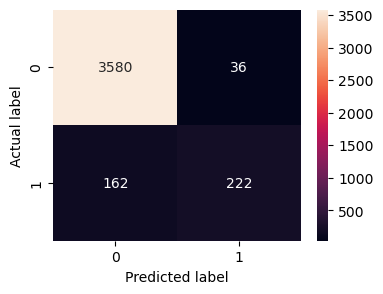

,Accuracy,Recall,Precision,F1-score
0,0.9505,0.9505,0.947468,0.946066


In [59]:
# get performance on train data

model_performance_classification(logreg, x_train_sd, y_train)

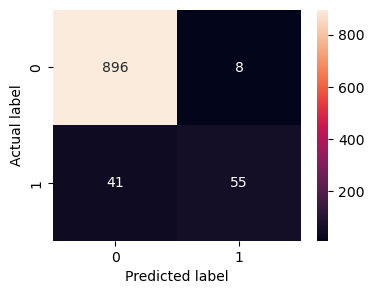

,Accuracy,Recall,Precision,F1-score
0,0.951,0.951,0.948253,0.946354


In [60]:
# get performance on test data

model_performance_classification(logreg, x_test_sd, y_test)

- This generalizes well because there is a slight improvement in the recall.

### Confusion Matrix

The confusion matrix

True Positives (TP): we correctly predicted that 55 accepted

True Negatives (TN): we correctly predicted that 896 rejected

False Positives (FP): we incorrectly predicted that (a "Type I error") 8 Falsely predict accept Type I error

False Negatives (FN): we incorrectly predicted that (a "Type II error") 45 Falsely predict reject Type II error

### **Model** **Improvement** **with** **SMOTE** **using** **the** **Training** **Data**

In [61]:
from imblearn.over_sampling import SMOTE, ADASYN, BorderlineSMOTE

In [62]:
# create an instance of the SMOTE

sm = SMOTE()

In [63]:
y_train.value_counts(normalize=True)

0    0.904
1    0.096
Name: Personal_Loan, dtype: float64

In [64]:
# Apply the SMOTE on the training data

x_train_sm, y_train_sm = sm.fit_resample(x_train, y_train) # this balances both classes in the data.

In [65]:
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

In [66]:
# Normalize the balanced training data

scaler = MinMaxScaler()

x_train_sm_sd = scaler.fit_transform(x_train_sm)
x_test_sm_sd = scaler.transform(x_test)

### **Re**-build the model on the balanced training dataset

In [67]:
# create an instance of the logistic regression and train the data
logreg_bal = LogisticRegression()

logreg_bal.fit(x_train_sm_sd, y_train_sm)

LogisticRegression()

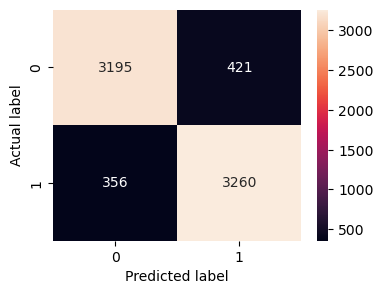

,Accuracy,Recall,Precision,F1-score
0,0.892561,0.892561,0.892688,0.892552


In [68]:
# get performance on balanced train data

model_performance_classification(logreg_bal, x_train_sm_sd, y_train_sm)

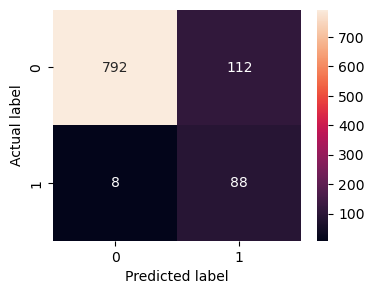

,Accuracy,Recall,Precision,F1-score
0,0.88,0.88,0.9372,0.897419


In [69]:
# get performance on balanced test data

model_performance_classification(logreg_bal, x_test_sm_sd, y_test)

- Even though the model is overfitting because there is a slight drop in the recall, there is still an improvement. Since we are trying to reduce the number of customer that will reject but the model is predicting to accept. 88 is predicted to accept while 8 customers are predicted to accept but they will reject the personal loan.

### **K-Nearest Neighbors (K-NN)**

In [70]:
# Import K-NN algorithm

from sklearn.neighbors import KNeighborsClassifier

In [71]:
# Create an instance of the K-NN

knn = KNeighborsClassifier()

In [72]:
# train the K-NN model on the balanced train data

knn.fit(x_train_sm_sd, y_train_sm)

KNeighborsClassifier()

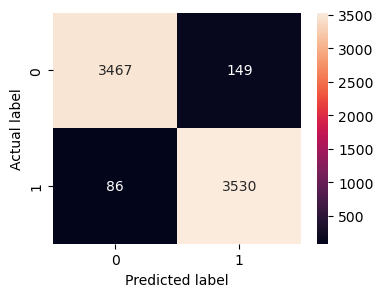

,Accuracy,Recall,Precision,F1-score
0,0.967506,0.967506,0.967647,0.967503


In [73]:
# get performance on balanced train data

model_performance_classification(knn, x_train_sm_sd, y_train_sm)

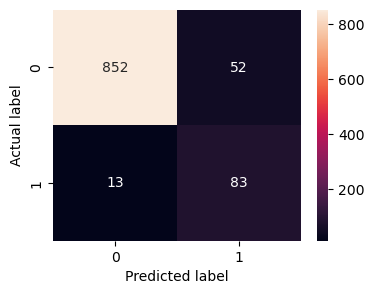

,Accuracy,Recall,Precision,F1-score
0,0.935,0.935,0.949436,0.939771


In [74]:
# get performance on balanced test data

model_performance_classification(knn, x_test_sm_sd, y_test)

### **Model Building with Decision Tree**

### Model evaluation criterion

#### Model can make wrong predictions as:
1. Predicting a customer will accept loan and the customer will reject
2. Predicting an employee will reject loan and the employee will accept

#### Which case is more important?
* Predicting that a customer will accept loan but will reject i.e. lose on profit from loan or asset.

#### How to reduce this loss i.e need to reduce False Negatives?
* Company wants Recall to be maximized, greater the Recall higher the chances of minimizing false negatives. Hence, the focus should be on increasing Recall or minimizing the false negatives or in other words identifying the true positives(i.e. Class 1) so that the company can provide incentives or other measure to encourage more customers to collect loans especially for customers with high deposit thereby optimizing the overall profit from loan.

In [75]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )
    return df_perf

In [76]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [77]:
dtree = DecisionTreeClassifier(random_state=0)

In [78]:
dtree.fit(x_train_sm_sd, y_train_sm)

DecisionTreeClassifier(random_state=0)

In [79]:
model_performance_classification_sklearn(dtree, x_train_sm_sd, y_train_sm)

,Accuracy,Recall,Precision,F1
0,1.0,1.0,1.0,1.0


In [80]:
model_performance_classification_sklearn(dtree, x_test_sm_sd, y_test)

,Accuracy,Recall,Precision,F1
0,0.969,0.947917,0.777778,0.85446


- This is overfitting, decision trees model is prone to overfitting when you want to get a pure leaf; that is a single category with gini value as zero.

### **Visualizing the Decision Tree**

In [81]:
# create a list of the column names

feature_names = x_train.columns.to_list()

feature_names

['Age',
 'Experience',
 'Income',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard']

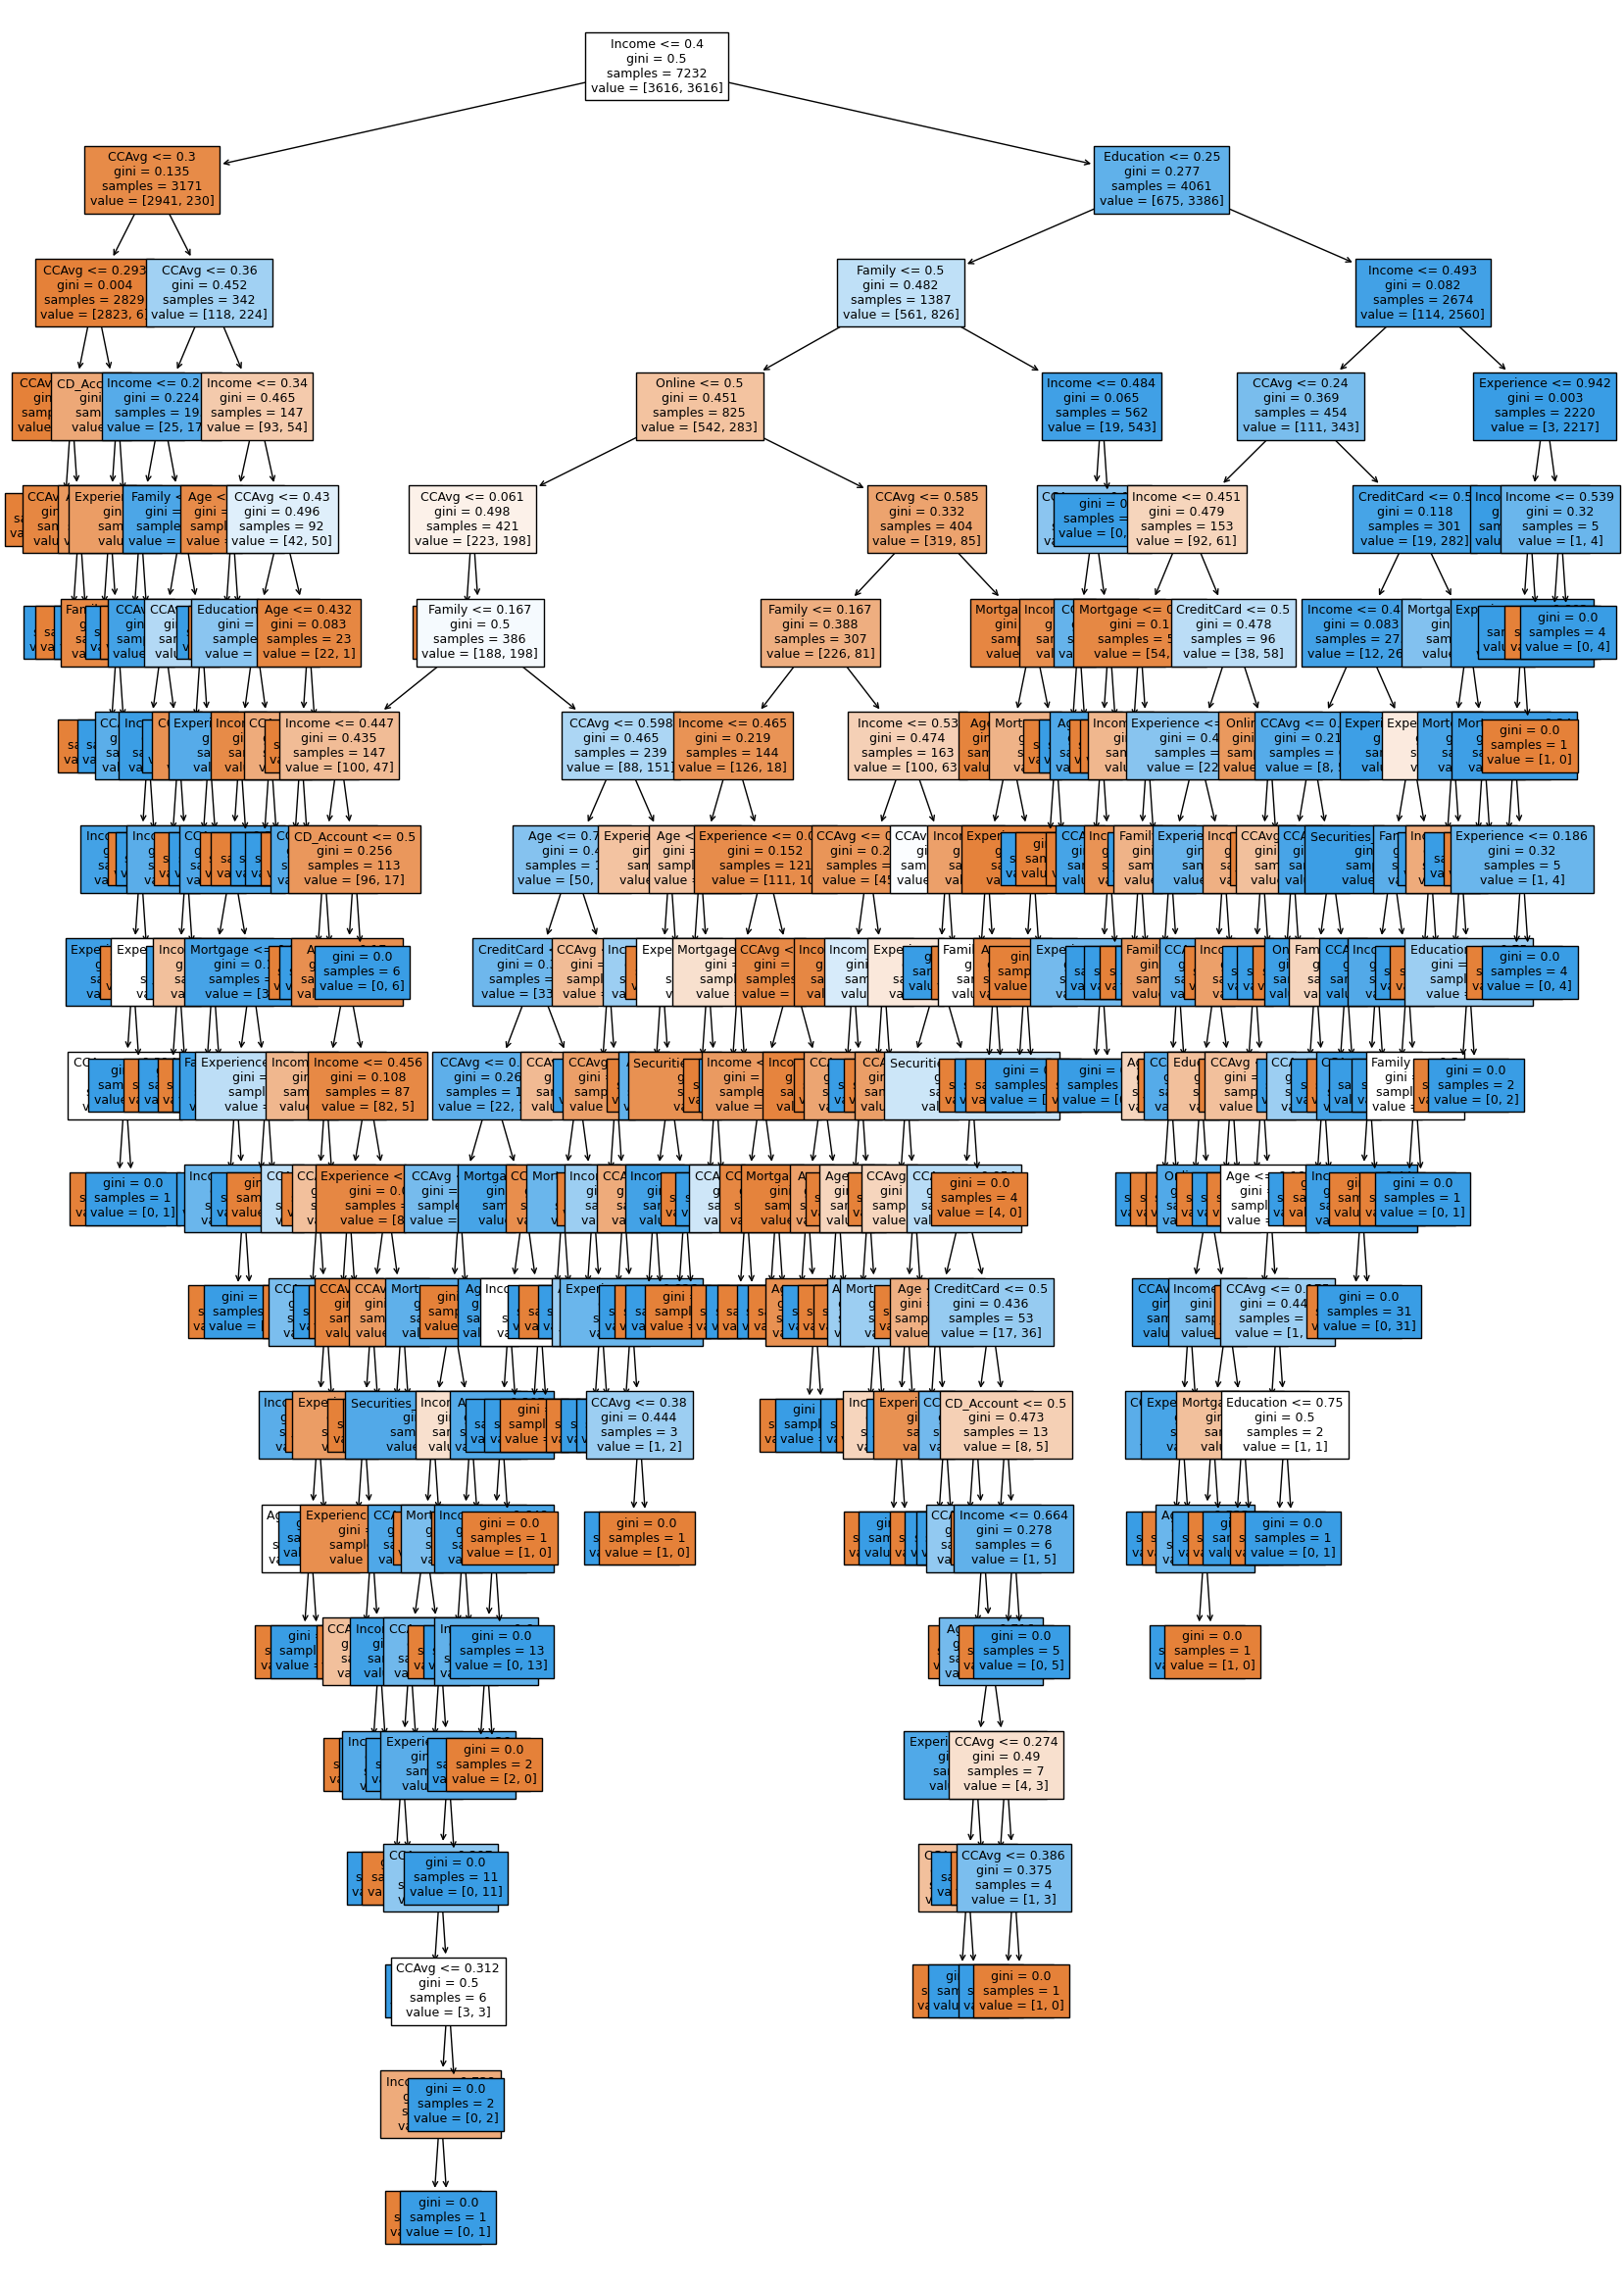

In [82]:
# display the decision tree

plt.figure(figsize=(20, 30))

out = tree.plot_tree(dtree, feature_names = feature_names, filled = True, fontsize=9, node_ids=False, class_names=None)

for o in out:
  arrow = o.arrow_patch
  if arrow is None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show()

### **Feature Importance**

In [83]:
# important features

importances = dtree.feature_importances_ # the higher the importance values, the more important the feature is.

importances

array([0.01473297, 0.01870669, 0.62772355, 0.08395292, 0.1559328 ,
       0.07111236, 0.00684524, 0.00175565, 0.00448015, 0.00841876,
       0.00633892])

In [84]:
indices = np.argsort(importances)

indices

array([ 7,  8, 10,  6,  9,  0,  1,  5,  3,  4,  2], dtype=int64)

In [85]:
# plot of important features

def plot_importance(dtree):
  importances = dtree.feature_importances_
  indices = np.argsort(importances)

  plt.figure(figsize=(12, 12))
  plt.title("Feature Importances")
  plt.barh(range(len(indices)), importances[indices], color="violet", align = "center")
  plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
  plt.xlabel("Relative Importance")
  plt.show()

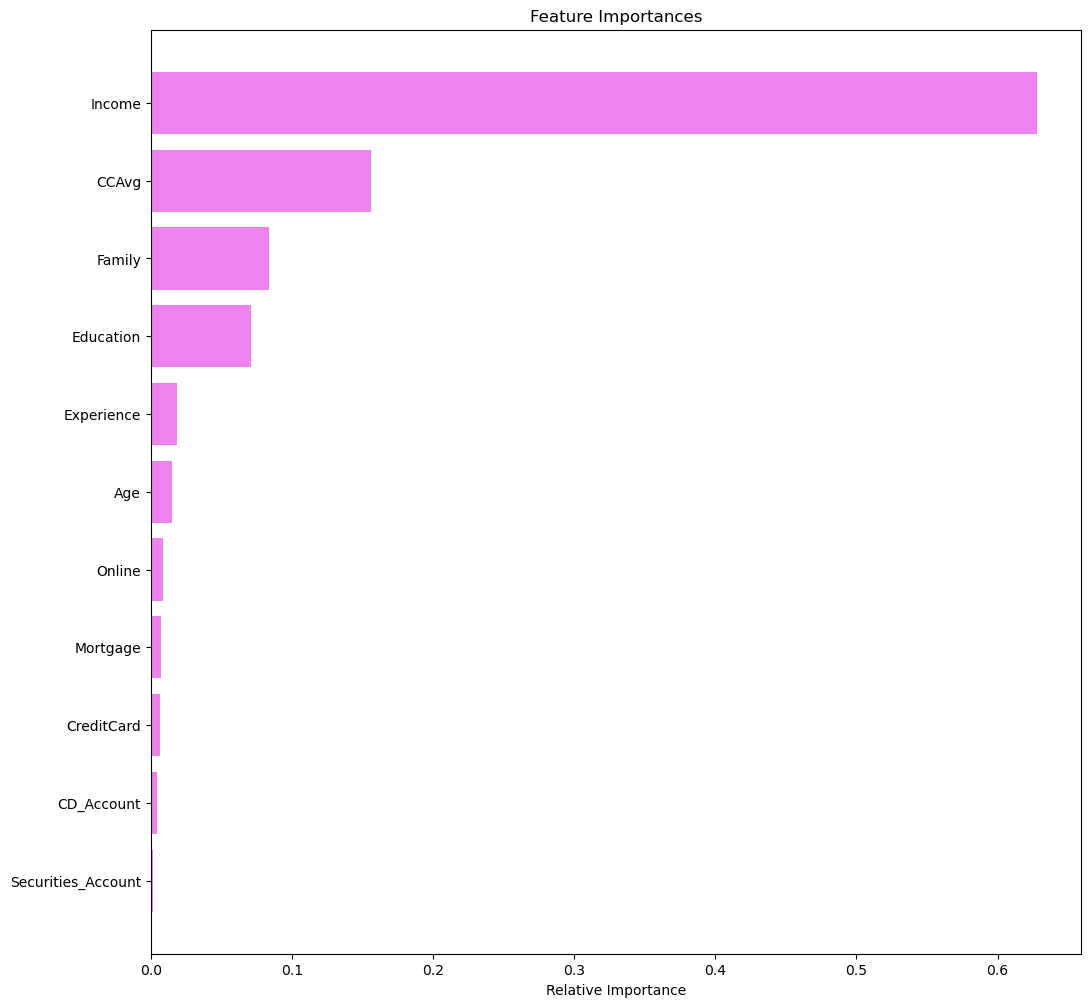

In [86]:
plot_importance(dtree)

- according to the decision tree plot, income, CCAvg, family, education and experience are more important than other features.

### Pre-**prunning**

In [87]:
y_train_sm.value_counts(normalize=True)

0    0.5
1    0.5
Name: Personal_Loan, dtype: float64

In [88]:
# equating the class weight of the target

dtree2 = DecisionTreeClassifier(random_state=0, max_depth=5, class_weight={0:0.5, 1.0:0.5})

dtree2.fit(x_train_sm_sd, y_train_sm)

DecisionTreeClassifier(class_weight={0: 0.5, 1.0: 0.5}, max_depth=5,
                       random_state=0)

In [89]:
# performance on the train set
model_performance_classification_sklearn(dtree2, x_train_sm_sd, y_train_sm)

,Accuracy,Recall,Precision,F1
0,0.946903,0.974834,0.923258,0.948345


In [90]:
# performance on the test set
model_performance_classification_sklearn(dtree2, x_test_sm_sd, y_test)

,Accuracy,Recall,Precision,F1
0,0.918,0.96875,0.540698,0.69403


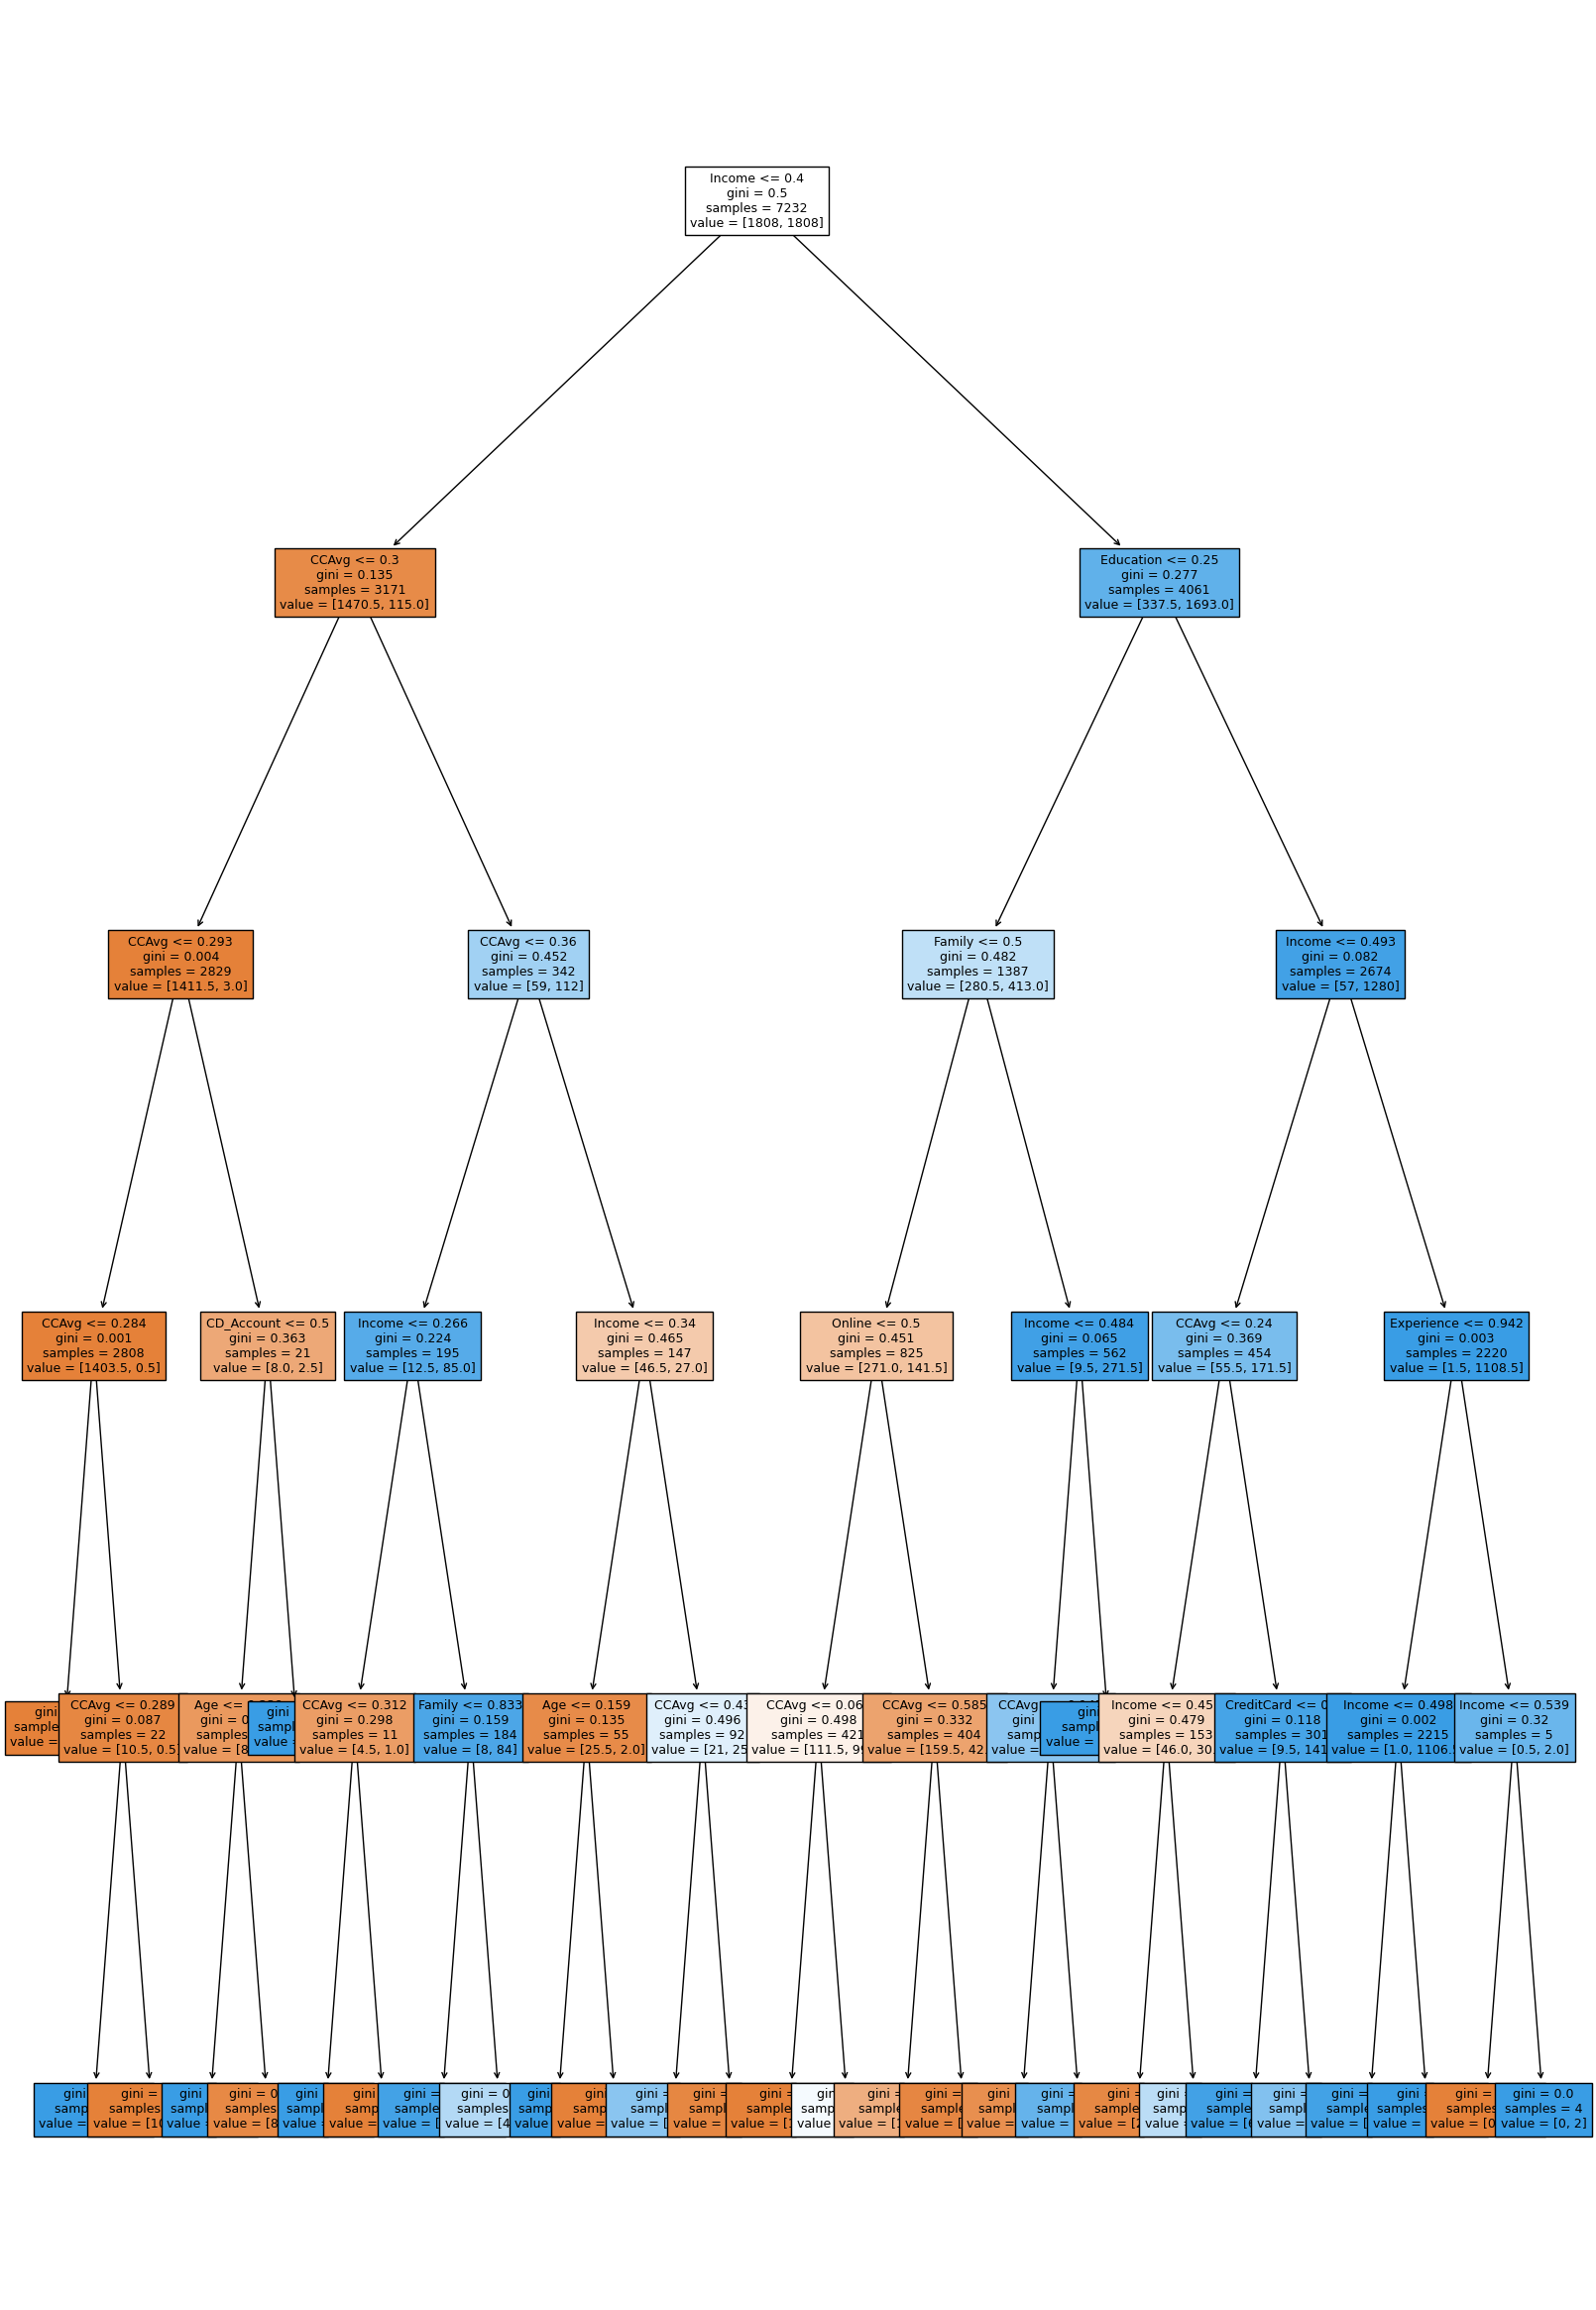

In [91]:
plt.figure(figsize=(20, 30))

out = tree.plot_tree(dtree2, feature_names = feature_names, filled = True, fontsize=9, node_ids=False, class_names=None)

for o in out:
  arrow = o.arrow_patch
  if arrow is None:
    arrow.set_edgecolor("black")
    arrow.set_linewidth(1)

plt.show()

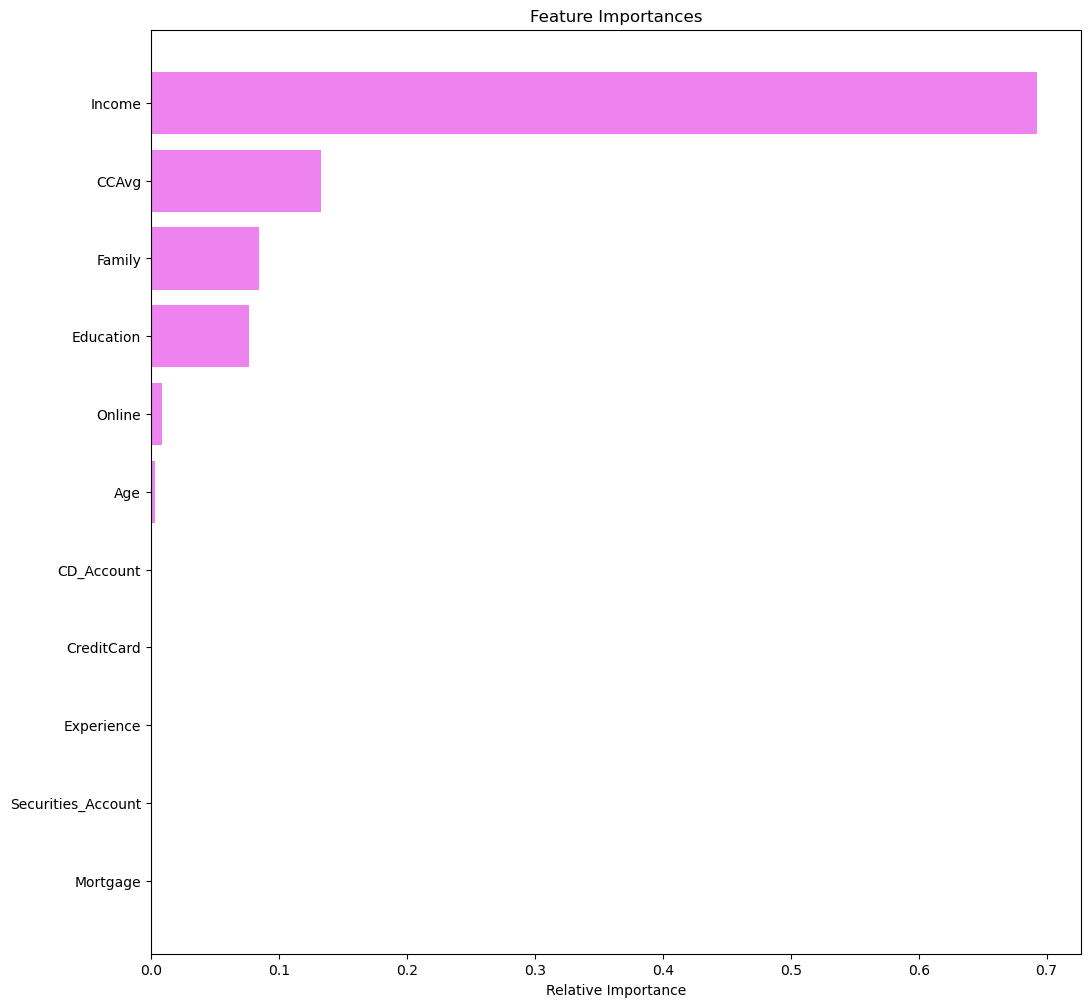

In [92]:
plot_importance(dtree2)

- According to the prunned decision tree plot above; income, CCAvg, family and education are more important than other features, excluding the experience.

Note: I can't continue to build different trees with different tree depts, so this is where Random forest models are introduced. Though vitualization may not be possible in random forest because of limited space.

### **Random Forests**

In [93]:
# import and build the random forest models

from sklearn.ensemble import RandomForestClassifier

In [94]:
rf = RandomForestClassifier(random_state=0, max_depth=5, class_weight={0:0.5, 1:0.5})

rf.fit(x_train_sm_sd, y_train_sm)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, max_depth=5,
                       random_state=0)

In [95]:
# model performance on training set

model_performance_classification_sklearn(rf, x_train_sm_sd, y_train_sm)

,Accuracy,Recall,Precision,F1
0,0.954646,0.995852,0.920031,0.956441


In [96]:
# model performance on test set

model_performance_classification_sklearn(rf, x_test_sm_sd, y_test)

,Accuracy,Recall,Precision,F1
0,0.898,0.96875,0.484375,0.645833


- This generalizes well compared with the previous models used.

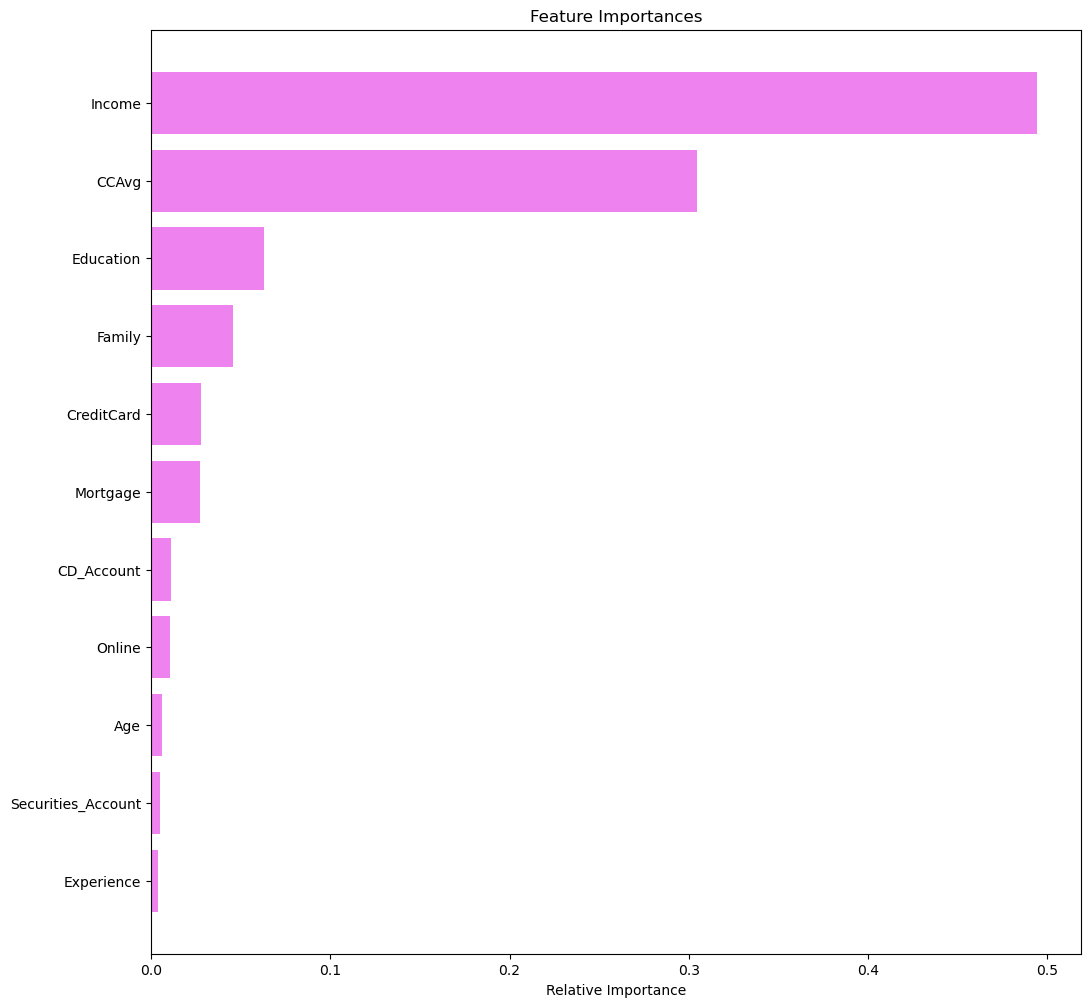

In [97]:
plot_importance(rf)

- The feature important plot above shows that income, CCAvg, family and education are more important than other features.

### **Gradient Boosting**

In [98]:
from sklearn.ensemble import GradientBoostingClassifier

In [99]:
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, random_state=0, max_depth=3)

gb.fit(x_train_sm_sd, y_train_sm)

GradientBoostingClassifier(random_state=0)

In [100]:
model_performance_classification_sklearn(gb, x_train_sm_sd, y_train_sm)

,Accuracy,Recall,Precision,F1
0,0.978014,0.984237,0.972139,0.97815


In [101]:
model_performance_classification_sklearn(gb, x_test_sm_sd, y_test)

,Accuracy,Recall,Precision,F1
0,0.961,0.958333,0.724409,0.825112


Note: Research has shown that tunning the parameters of GradientBoosting, it tends to do well.

### Hyperparameters Tuning on Random Forests

In [102]:
from sklearn.model_selection import KFold, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [103]:
estimator = RandomForestClassifier(random_state=0, class_weight={0:0.5, 1:0.5})

# set the hyperparameters
parameters = {
    "n_estimators": [100, 120, 150],
    "max_depth": [3, 5, 8, 10],
    "criterion": ["entropy", "gini"],
    "max_features": ["sqrt", "log2"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01]
}

grid_obj = GridSearchCV(estimator, parameters, scoring= "recall", n_jobs=-1, cv=5)

grid_obj = grid_obj.fit(x_train_sm_sd, y_train_sm)

In [104]:
best_rf = grid_obj.best_estimator_

best_rf.fit(x_train_sm_sd, y_train_sm)

RandomForestClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=3, max_features='sqrt',
                       min_impurity_decrease=1e-05, random_state=0)

In [105]:
model_performance_classification_sklearn(best_rf, x_train_sm_sd, y_train_sm)

,Accuracy,Recall,Precision,F1
0,0.912058,0.996405,0.852579,0.918898


In [106]:
model_performance_classification_sklearn(best_rf, x_test_sm_sd, y_test)

,Accuracy,Recall,Precision,F1
0,0.847,0.979167,0.383673,0.55132


#### Conclusion:

- Random forests model happens to have a better prediction result with recall 98.95% on training and 98.95% on testing without adjusting the class weights
- Income, CCAvg, family and education are significant features to be put into consideration.
- The category of customers to target are the ones that the model predicted to accept the personal loan but will reject it eventually. So, we must look for every means to encourage more customers to buy the personal loan.